# Explorative Data Analysis
Of the Airport Forescasting data based on patterns over time according to `ScheduleTime`

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data

In [2]:
data_path = os.path.join('..', 'src', 'data', 'raw', 'data.xlsx')
data = pd.read_excel(data_path)
data.shape

(36770, 9)

## Missing Values

Check if any Null values exists in the data

In [3]:
data.isna().any().any()

True

Check how many and how big a percentage

In [4]:
# Double sum() to sum over rows and columns
num_of_nan = data.isna().sum().sum()
print(f'Number of NaN values: {num_of_nan}\nNaN percentage: {num_of_nan/(data.shape[0]*data.shape[1])}')

Number of NaN values: 5
NaN percentage: 1.5108935424409996e-05


So, NaNs are not an issue it seems. Looking at the specific columns with NaNs.

In [5]:
data.isna().sum()

ScheduleTime    0
Airline         1
FlightNumber    0
Destination     2
AircraftType    0
FlightType      0
Sector          2
SeatCapacity    0
LoadFactor      0
dtype: int64

In [6]:
data[data['Airline'].isna() | data['Destination'].isna() | data['Sector'].isna()]

ScheduleTime Airline  FlightNumber Destination AircraftType  \
34353 2022-01-19 07:00:00      SV          3733         NaN          73H   
36241 2022-01-22 00:35:00     NaN          1250         NaN          CRK   

      FlightType Sector  SeatCapacity  LoadFactor  
34353          C    NaN           189    0.550265  
36241          C    NaN           100    0.420000

In [7]:
data = data.dropna()

## Plotting Timeseries

In [8]:
fig = px.scatter(data, x='ScheduleTime', y='LoadFactor')
fig.show()

In [9]:
fig = px.scatter(data, x='ScheduleTime', y='SeatCapacity')
fig.show()

In [10]:
px.histogram(data, x='ScheduleTime')

In [11]:
def scatter_loadfactor_per_group(group, size=(15, 100)):
    groups = data.groupby(group)
    c = 2
    r = int(np.ceil(len(groups.groups)/c))
    destinations = list(groups.groups.keys())

    fig, ax = plt.subplots(r, c, figsize=size)

    g_id = 0
    for col in tqdm(range(c)):
        for row in range(r):
            if g_id == len(destinations):
                break
            g = destinations[g_id]
            g_df = groups.get_group(g)
            ax[row, col].scatter(g_df['ScheduleTime'], g_df['LoadFactor'])
            ax[row, col].set_title(g)
            ax[row, col].set_xlabel('ScheduleTime')
            ax[row, col].set_ylabel('LoadFactor')
            g_id += 1

    fig.tight_layout()
    plt.show()

100%|██████████| 2/2 [00:00<00:00, 19.58it/s]


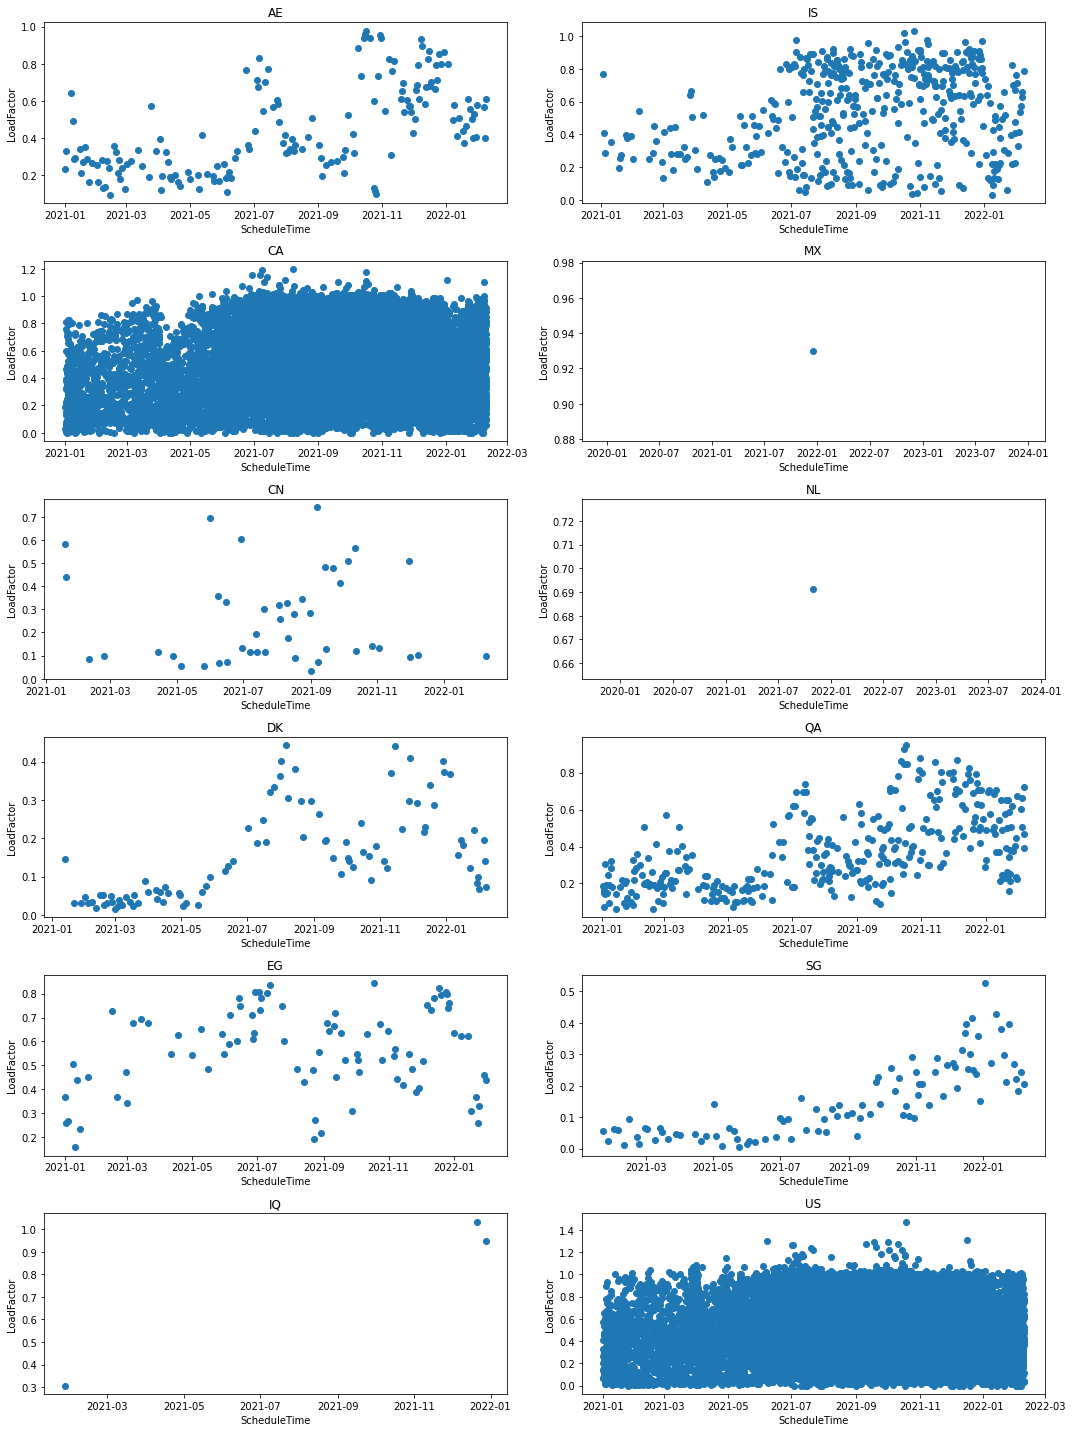

In [19]:
scatter_loadfactor_per_group('Sector', size=(15,20))